___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.express as px

from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
import cufflinks as cf

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstones/Fraud_detection/creditcard.csv")
df = data.copy()
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75774,56243.0,1.303180,0.174164,0.145015,0.434572,-0.114238,-0.519536,0.029089,-0.132440,0.159177,-0.057117,-1.030181,-0.109496,0.082410,0.266696,1.135946,0.566131,-0.705638,-0.220527,0.196871,-0.073822,-0.311951,-0.934262,0.030232,-0.470335,0.313396,0.146968,-0.034194,0.011130,9.99,0
66647,52153.0,-3.339994,0.933471,-0.523711,0.375672,-1.872010,0.168764,-0.520889,1.644497,0.025570,-0.793425,-2.015330,0.989352,1.433797,0.412571,-0.211870,0.643280,0.155343,0.269978,0.304078,-0.086404,0.135251,0.395739,-0.415017,-0.324587,0.153422,0.497076,0.142197,-0.210885,159.99,0
276706,167254.0,1.904080,-0.211896,-2.149085,0.333706,0.399453,-0.724219,0.139450,-0.104048,0.615591,-0.340689,0.495580,-0.359711,-1.598043,-0.329625,0.498929,0.674880,0.111702,1.408309,0.032241,-0.120864,0.227765,0.551322,-0.167689,-0.914811,0.221779,-0.073088,-0.028231,-0.036927,81.66,0
47723,43330.0,-1.510308,0.780684,2.085747,3.123133,0.589557,1.301681,-1.300991,-2.345333,0.148722,1.063008,-1.880357,0.310972,0.954299,-1.106463,-0.786016,-0.555324,0.335237,0.185638,1.543806,-0.644864,2.229818,-0.046062,-0.341324,-0.370869,-0.201199,0.423964,0.210998,-0.058616,0.00,0
256148,157558.0,-0.319630,0.951100,-0.498768,-0.890640,0.676875,-0.193813,0.511754,0.467001,-0.382184,-0.473956,-0.269903,0.592435,0.023836,0.600708,-1.002092,0.474994,-0.799988,0.053884,0.514815,-0.087055,-0.220755,-0.652121,0.014437,-1.108965,-0.374646,0.191938,0.116627,0.006977,12.57,0
260508,159588.0,2.066453,-0.113677,-1.567914,0.202822,0.286065,-0.737611,0.148411,-0.262246,0.684496,0.004113,-1.041611,0.006400,-0.121266,0.483546,0.874543,-0.046423,-0.641069,0.152493,-0.130720,-0.183858,0.241330,0.773280,-0.015310,0.503586,0.297713,-0.119957,-0.026860,-0.050969,19.95,0
271143,164430.0,0.000074,0.597347,-0.403545,-0.364967,1.131238,-0.758516,1.334136,-0.546708,0.227070,-0.072412,1.027402,-0.160941,-0.698663,-0.996454,0.209478,0.128216,-0.066847,1.226599,0.169647,0.118787,0.191425,1.103628,-0.127884,-0.479196,-0.364758,-0.193786,-0.047700,-0.283935,43.68,0


### Exploratory Data Analysis

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.duplicated().sum()

1081

In [4]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [5]:
def configure_plotly_browser_state():       ### to show grapgh of iplot you shpuld use this func in every iplot cell in python 3
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [6]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

configure_plotly_browser_state() ## iplot not show WO this

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [7]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))


In [8]:
df=df.drop(['Time'],axis=1)

In [9]:
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
67555,-0.759270,-0.014572,1.995706,-0.790804,-0.515505,0.709676,0.154738,0.368284,-1.196317,0.009938,0.314034,-0.048165,-0.664537,-0.051434,-0.734110,-1.199032,-0.404799,1.778075,-1.724849,-0.468083,-0.074018,0.173488,-0.118873,-0.359463,0.198744,-0.348245,0.111605,0.095030,83.50,0,14.0
164282,-6.168734,5.308461,-4.764475,-0.734801,-3.494095,-1.846573,-2.758955,4.373177,0.350296,0.716549,-2.195543,1.926296,0.683128,2.607860,-0.624495,0.954083,1.242983,-0.541608,-0.474318,0.224077,-0.186237,-0.926991,0.664431,-0.004435,0.296408,0.181063,-0.129455,-0.161479,15.98,0,32.0
183785,-0.144774,0.939803,-0.682279,-0.316294,1.367724,0.106907,0.731928,0.135217,0.060103,-0.841025,0.190296,0.019121,-0.024049,-0.902326,1.521889,-0.888056,1.385901,-0.712572,-1.347943,-0.072129,0.361500,1.356369,-0.096878,-1.105976,-0.557877,-0.054176,0.300134,0.200356,9.00,0,34.0
41612,-1.385123,-1.724855,0.331825,-1.329566,2.336569,3.354452,-0.865519,1.016952,-1.347582,0.193360,-0.409589,-0.849006,0.090592,-0.342058,0.229414,0.508036,0.571270,-0.937029,2.476409,1.085029,0.117270,-0.403976,0.363832,1.000241,0.512220,-0.141721,-0.012156,0.103879,179.00,0,11.0
254908,-5.098230,5.080854,-3.316502,-2.645630,0.678692,-0.994448,1.503433,-0.050115,3.590143,6.714172,1.123533,0.972726,0.572755,-1.055656,-0.483847,-0.996096,-1.128218,-0.276691,-0.372085,2.876551,-0.510604,0.656912,-0.076886,0.205029,0.751694,-0.003616,1.234318,-0.000928,0.92,0,43.0
230682,-3.271802,-3.885757,-1.683881,-1.441056,1.176005,-1.236587,0.542786,0.391354,-1.593216,-0.188340,0.100910,-0.283987,-0.116009,0.719947,-1.371111,1.323422,-0.186227,-0.592933,0.142921,1.880299,0.969709,0.787263,0.925578,0.218346,-0.128411,-0.301648,0.155191,-0.239175,485.85,0,40.0
124571,1.457629,-1.418474,0.896945,-1.404678,-1.738062,0.416408,-1.721798,0.257000,-1.140424,1.438734,-0.035923,-0.570593,-0.130870,-0.688424,-0.804098,-0.016388,0.213759,0.892413,0.522206,-0.330723,-0.249292,-0.218951,-0.045123,-0.525951,0.304716,-0.159555,0.069218,0.013461,18.00,0,21.0
281896,-2.397815,2.804093,-2.403715,-0.617481,-0.657410,-1.161475,-0.491408,1.655122,0.275814,-0.186205,-1.173627,0.432172,-0.040469,-0.042136,-0.283560,0.726401,1.027565,-0.124949,-0.416566,0.192307,-0.328352,-1.015014,0.332148,0.603305,-0.093392,0.140893,0.257190,0.123101,12.99,0,47.0
66844,-3.639671,2.215106,-0.648493,1.298062,-1.463020,-0.627374,-0.700448,1.505790,-0.298720,0.652168,-0.445020,0.631715,0.213550,1.170298,1.484336,-0.274533,0.863846,-0.276044,0.089761,-0.355158,0.209778,0.672557,0.295886,0.409071,0.018104,-0.217825,-0.384738,0.292474,32.98,0,14.0
232154,-0.927124,1.639275,-1.333649,-0.989533,0.713851,-1.850786,1.286775,-0.028208,-0.658942,-0.531220,-0.853408,0.848020,1.197054,0.803813,-0.357568,-0.592920,-0.255991,-0.519459,-0.144208,-0.166592,0.329295,1.044004,-0.132535,0.135020,-0.253218,0.032145,-0.281769,-0.086393,1.46,0,40.0


In [ ]:
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_time = pd.DataFrame(tmp)
df_time.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_time.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


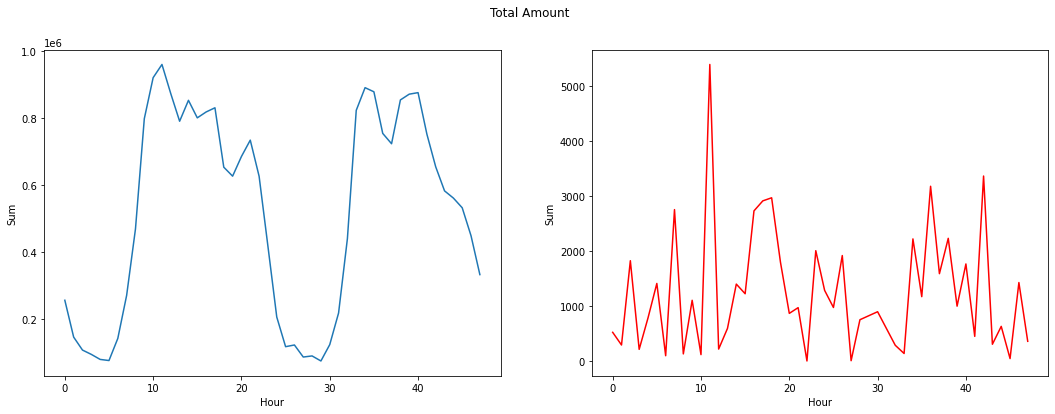

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_time.loc[df_time.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_time.loc[df_time.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

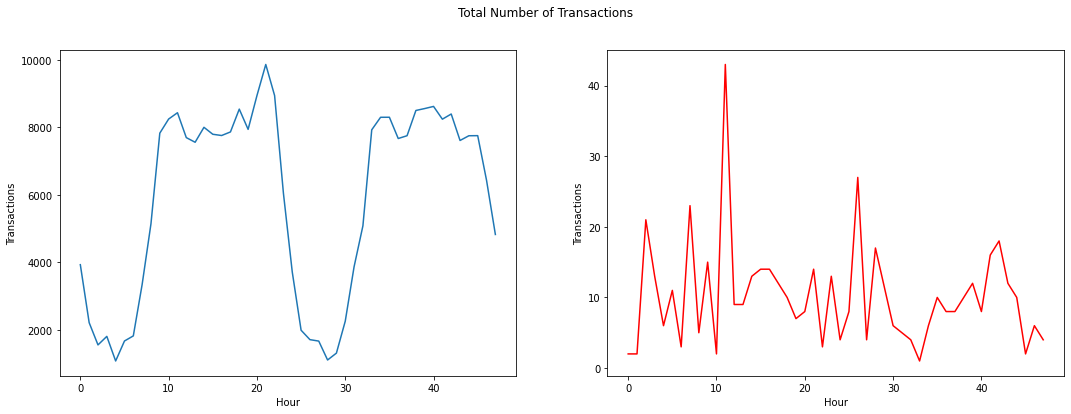

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df_time.loc[df_time.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df_time.loc[df_time.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

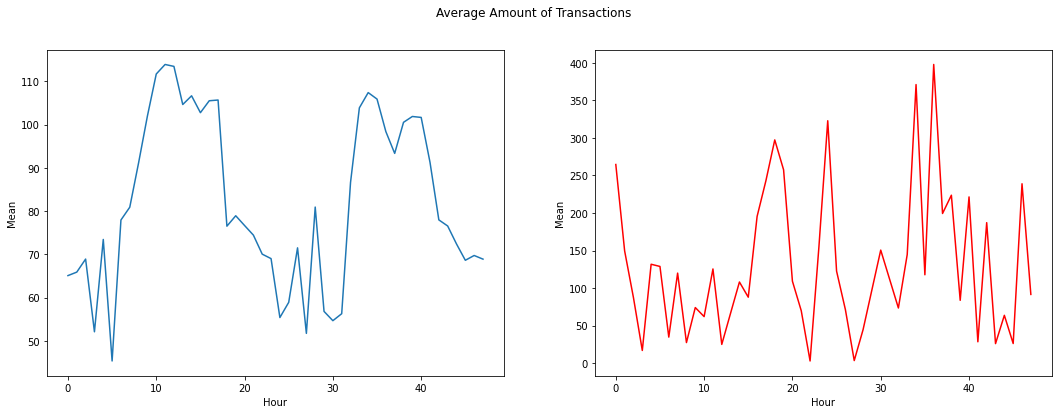

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df_time.loc[df_time.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df_time.loc[df_time.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

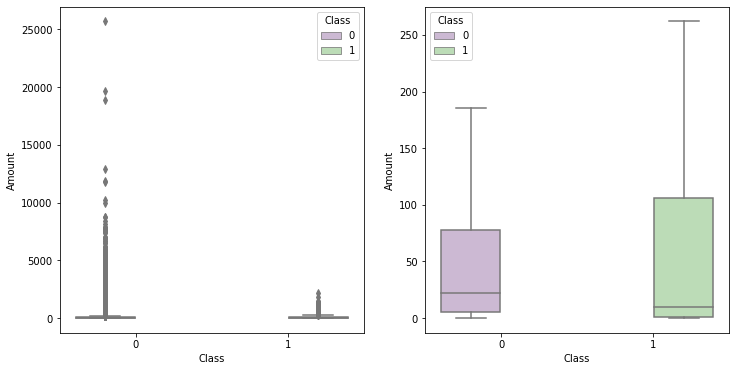

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

<Figure size 432x288 with 0 Axes>

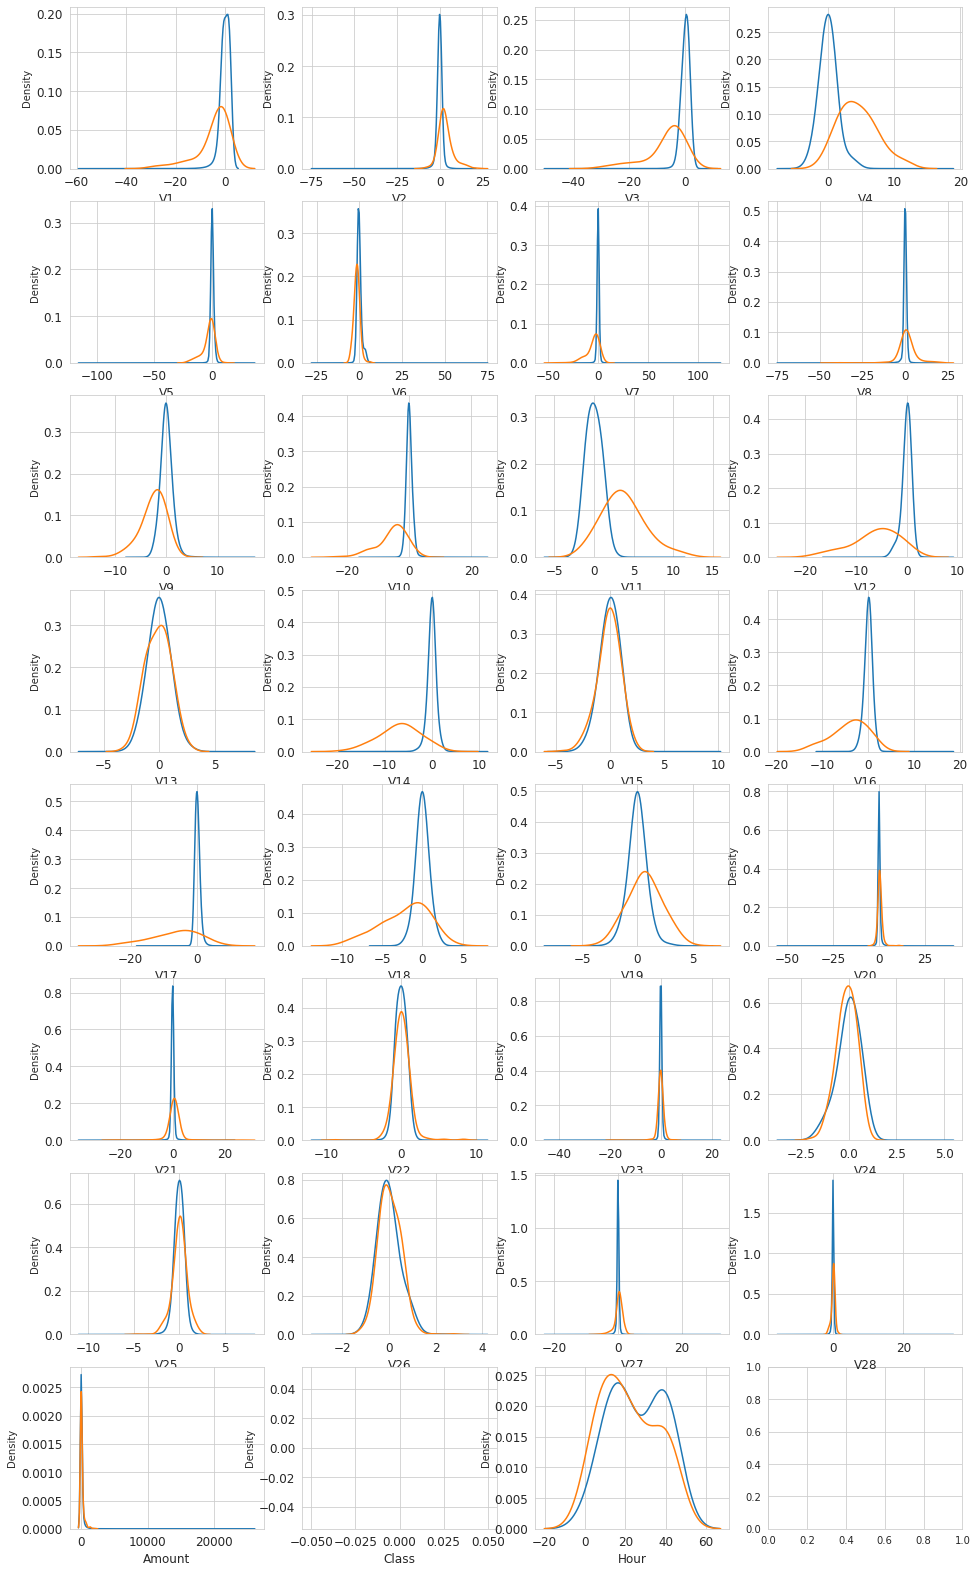

In [10]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

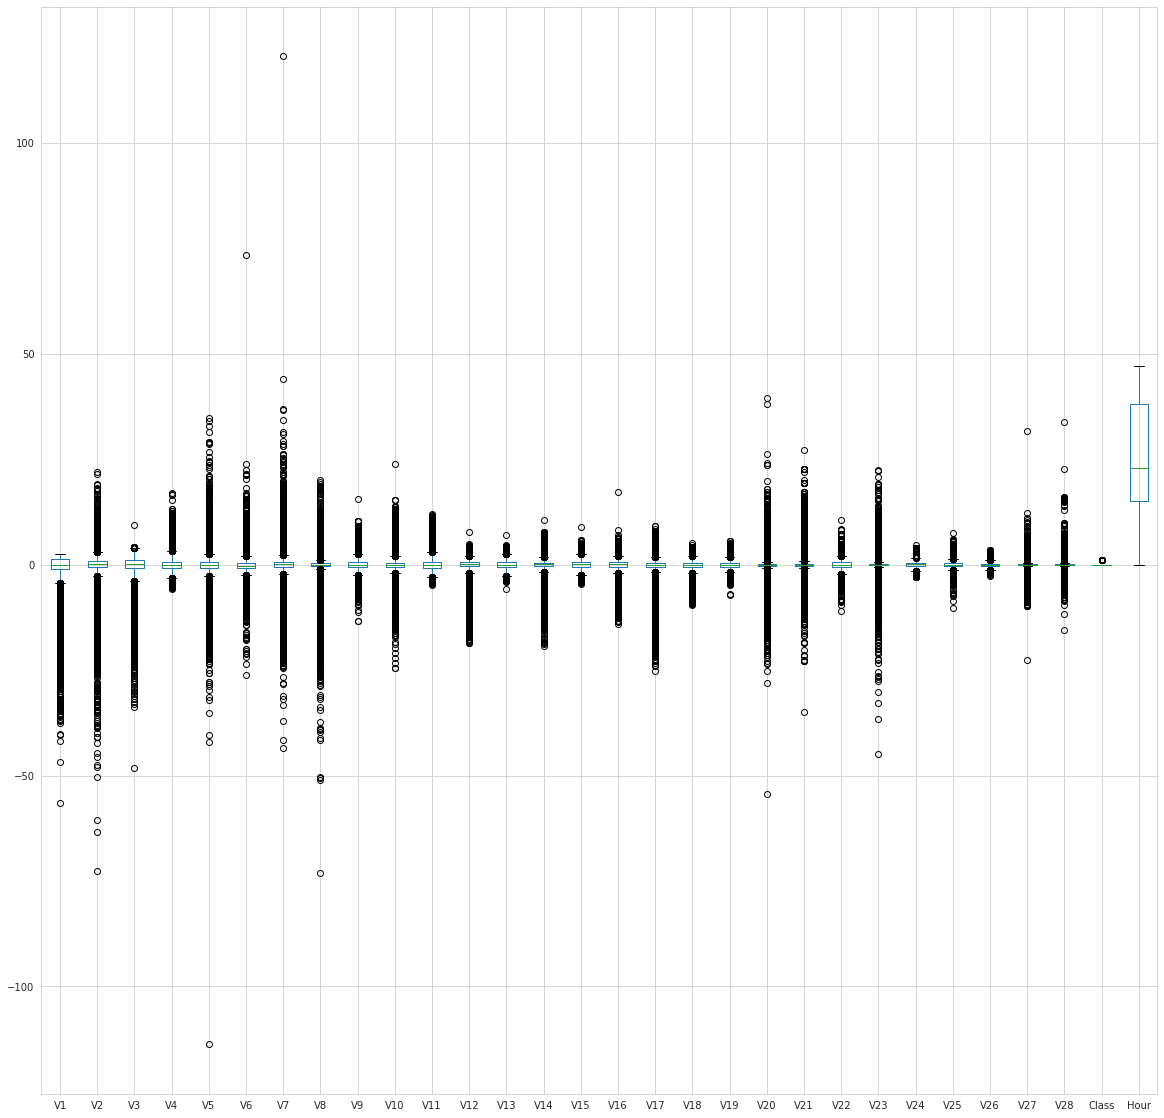

In [11]:
plt.figure(figsize=(20,20))
df.drop(['Amount'], axis=1).boxplot();

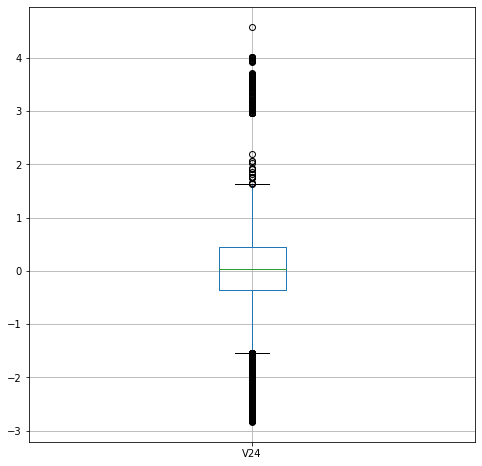

In [ ]:
plt.figure(figsize=(8,8))
df[['V24']].boxplot()

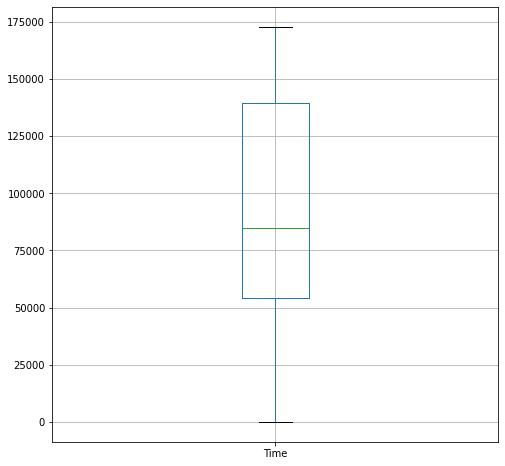

In [ ]:
plt.figure(figsize=(8,8))
df[['Time']].boxplot()

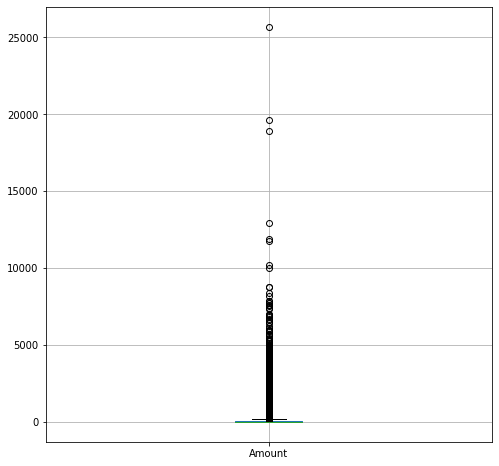

In [ ]:
plt.figure(figsize=(8,8))
df[['Amount']].boxplot()

In [12]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



99.83 % of the dataset is not frauds
0.17 % of the dataset is frauds


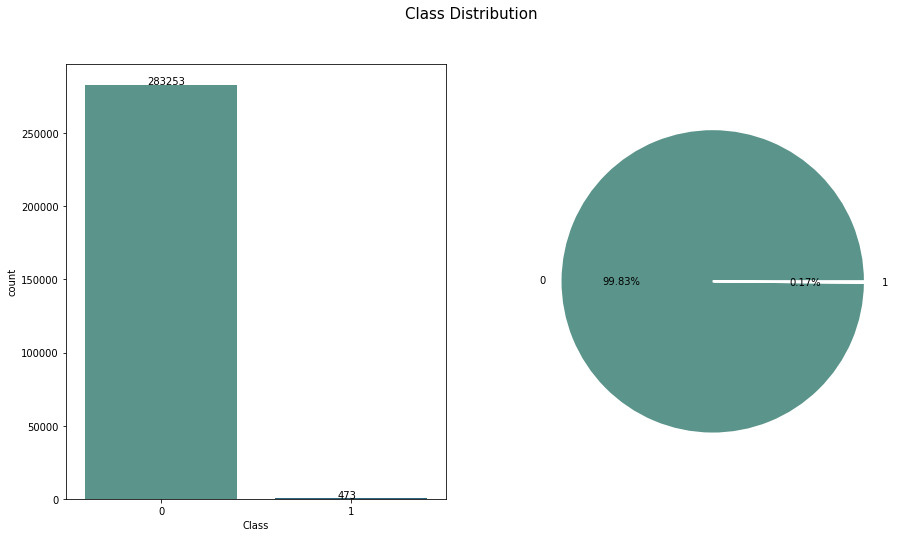

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15, 8))
sns.countplot(df.Class, palette = "crest", ax=ax[0])
for p in ax[0].patches:
        ax[0].annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+50))

_, _, autotexts = plt.pie(df['Class'].value_counts(ascending=False),labels=['0', '1'], autopct='%1.2f%%', explode=[0,0.01],
        wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True} , colors = ['#5a948a', '#2b667c']);
for ins in autotexts:
    ins.set_color('black');

plt.suptitle("Class Distribution", fontsize=15);

print(round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset is not frauds')
print(round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset is frauds')

In [ ]:
## The classes are heavily unbalanced.

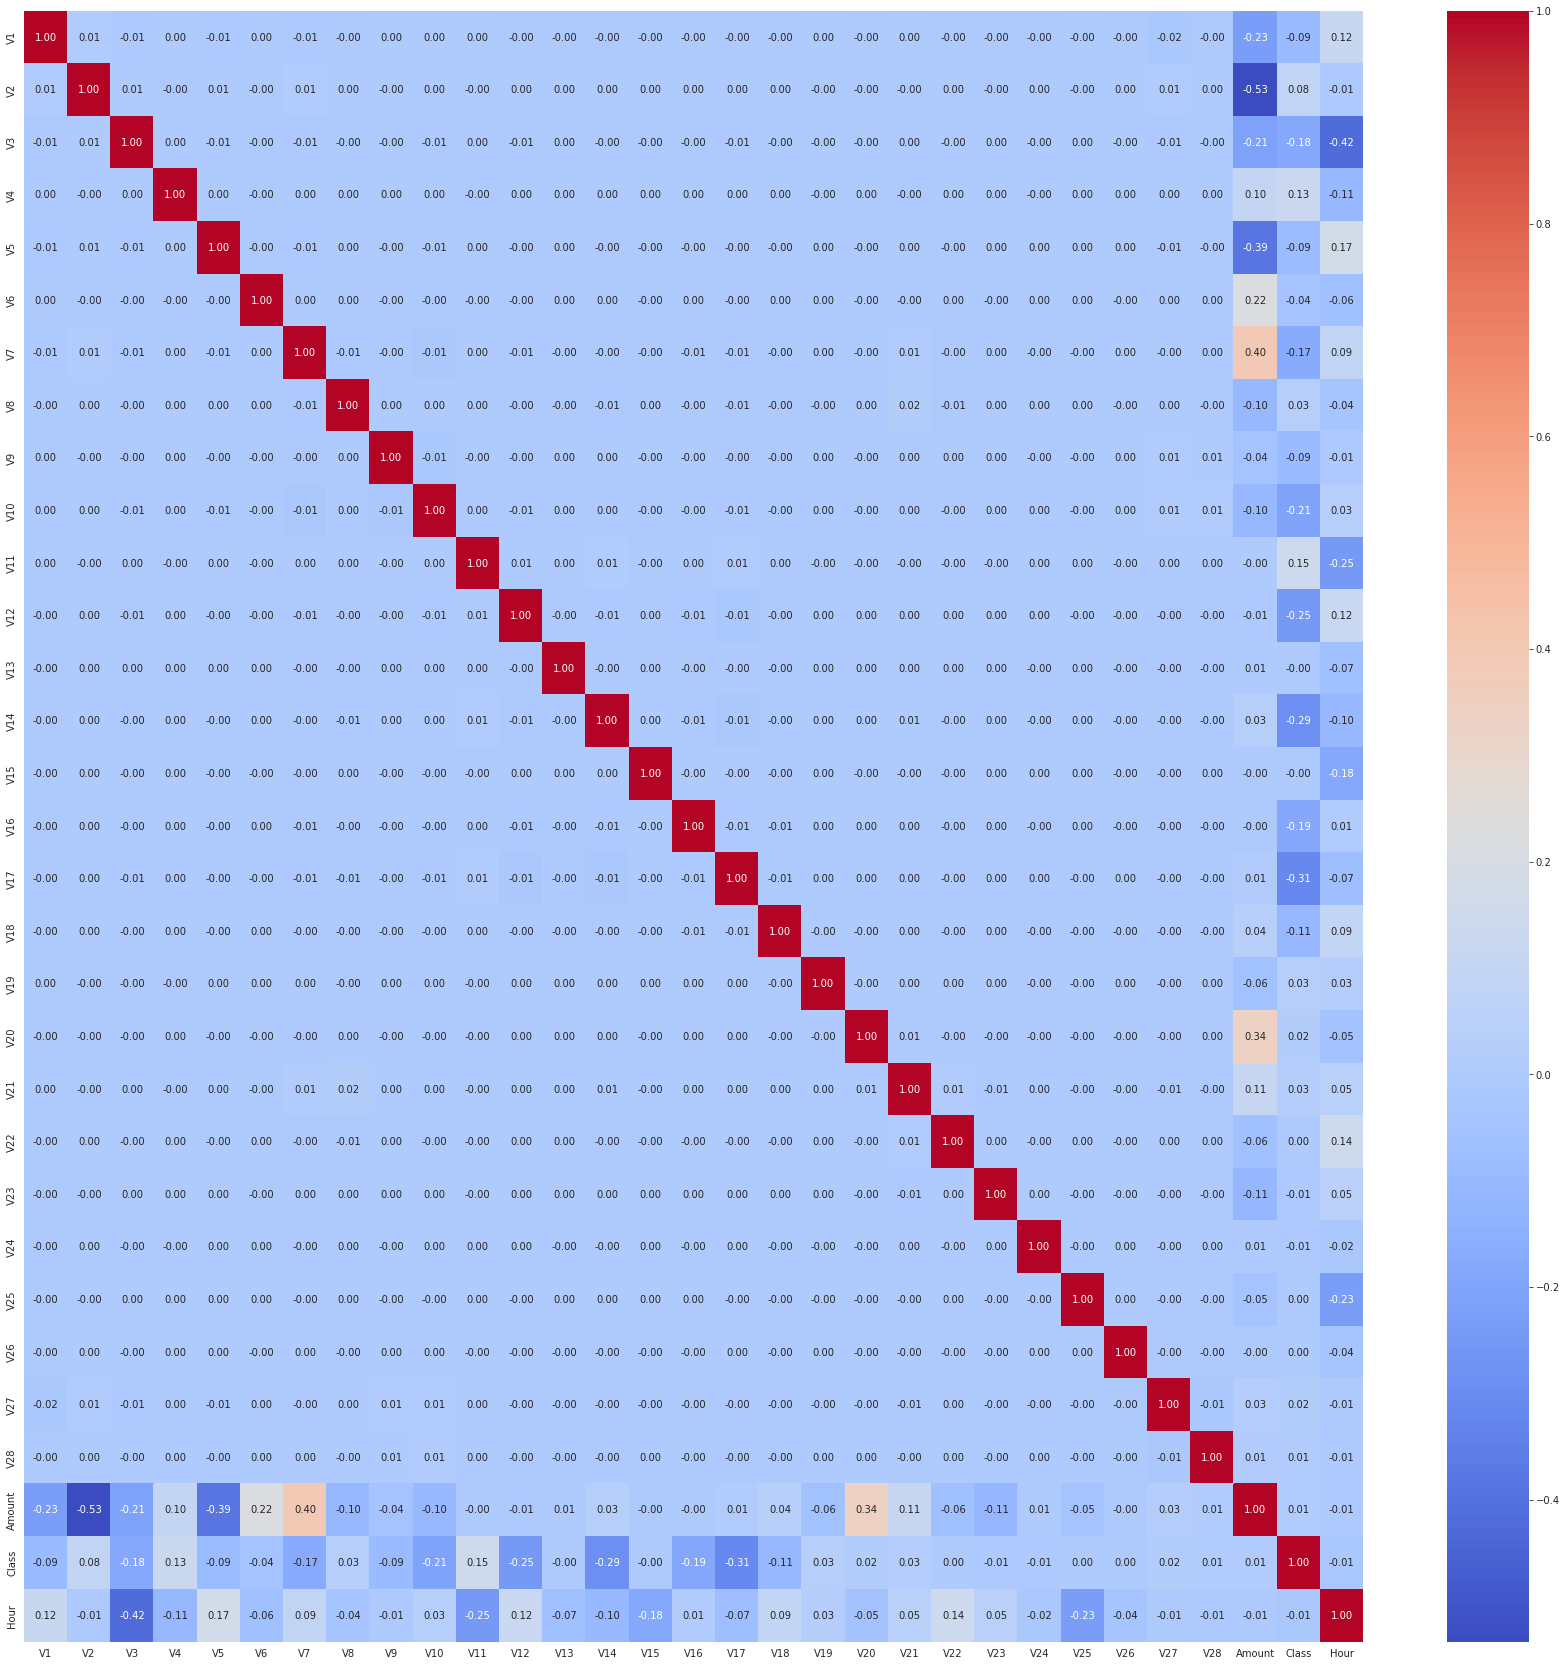

In [13]:
plt.figure(figsize=(30, 30))

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f');

In [ ]:
#no fraud
df[df.Class == 0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#fraud
df[df.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

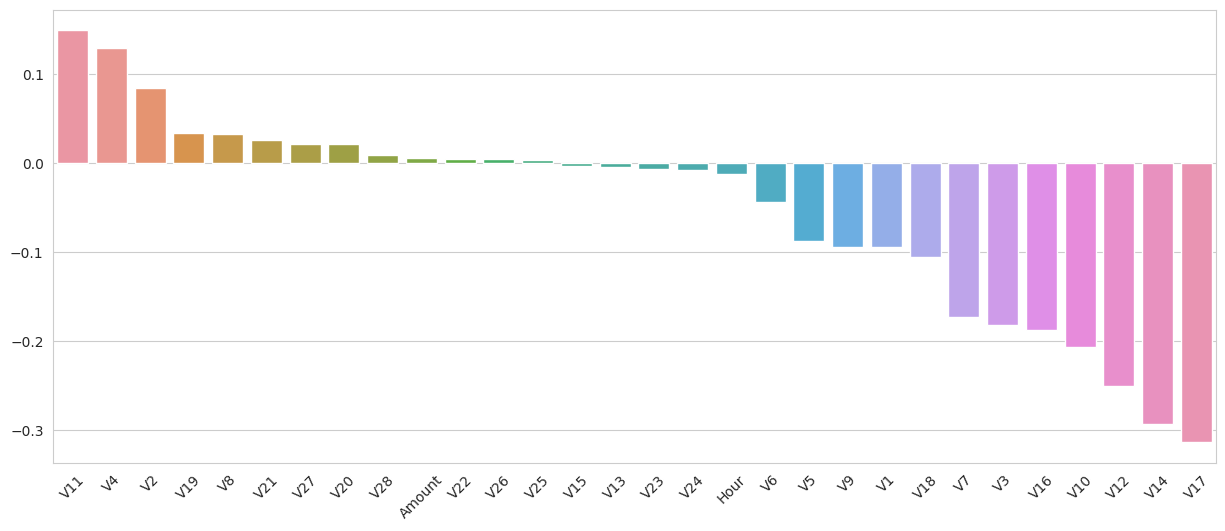

In [14]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

In [15]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hour'],
      dtype='object')

In [16]:
df_corr_class = df.corr()[['Class']].sort_values(by='Class', ascending=False)
df_corr_class

,Class
Class,1.000000
V11,0.149067
V4,0.129326
V2,0.084624
V19,0.033631
V8,0.033068
V21,0.026357
V27,0.021892
V20,0.021486
V28,0.009682


---
---


## 2. Data Preprocessing

In [23]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier



# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
 

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)
import warnings
warnings.filterwarnings("ignore")

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [25]:
X = df.drop(['Class'], axis=1)
y = df['Class']

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=101)

In [210]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (198608, 30)
Train target shape   :  (198608,)
Test features shape  :  (85118, 30)
Test target shape    :  (85118,)


In [211]:
y_train.value_counts()[1]/y_train.value_counts()[0]


0.0016693817235483692

In [212]:
 y_test.value_counts()

0    84976
1      142
Name: Class, dtype: int64

In [213]:
y_test.value_counts()[1]/y_test.value_counts()[0]

0.0016710600640180756

#### Scaling

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

***ii. Model Training***

In [214]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [215]:
from sklearn.pipeline import Pipeline
operations = [("scaler", RobustScaler()), ("log", LogisticRegression(class_weight={0:1,1:25},max_iter=10000,random_state=101))]   
pipe_log_model = Pipeline(steps=operations)

In [216]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[84912    64]
 [   27   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.64      0.81      0.72       142

    accuracy                           1.00     85118
   macro avg       0.82      0.90      0.86     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198124    153]
 [    52    279]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.65      0.84      0.73       331

    accuracy                           1.00    198608
   macro avg       0.82      0.92      0.87    198608
weighted avg       1.00      1.00      1.00    198608



## Cross Validate

In [217]:
from sklearn.model_selection import cross_validate

In [218]:
model = LogisticRegression(class_weight={0:1,1:25},max_iter=10000,random_state=101)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,1.594527,0.043160,0.558140,0.727273,0.631579,0.998590
2,1.653044,0.035476,0.583333,0.848485,0.691358,0.998741
3,1.471706,0.035899,0.771429,0.818182,0.794118,0.999295
4,1.456312,0.035606,0.674419,0.878788,0.763158,0.999094
5,1.471694,0.035398,0.604651,0.787879,0.684211,0.998792
6,1.513522,0.036642,0.617021,0.878788,0.725000,0.998892
7,1.473066,0.040725,0.666667,0.909091,0.769231,0.999094
8,1.504631,0.035560,0.681818,0.882353,0.769231,0.999094
9,1.604208,0.035418,0.553191,0.787879,0.650000,0.998590
10,1.476695,0.035351,0.600000,0.818182,0.692308,0.998792


In [219]:
df_scores.mean()[2:]                      

test_precision    0.631067
test_recall       0.833690
test_f1           0.717019
test_accuracy     0.998897
dtype: float64

In [220]:
model.fit(X_train,y_train)
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[84898    78]
 [   27   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.60      0.81      0.69       142

    accuracy                           1.00     85118
   macro avg       0.80      0.90      0.84     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198092    185]
 [    54    277]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.60      0.84      0.70       331

    accuracy                           1.00    198608
   macro avg       0.80      0.92      0.85    198608
weighted avg       1.00      1.00      1.00    198608



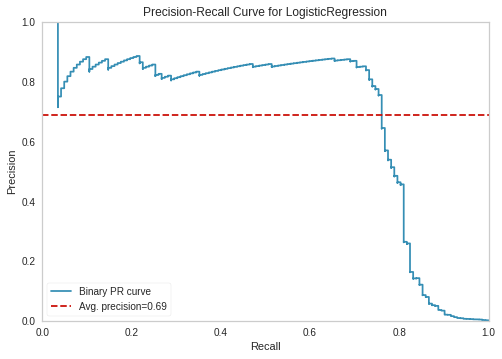

In [221]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", RobustScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["0", "1"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [222]:
viz.score_        

0.6868574929113259

***iii. Prediction and Model Evaluating***

***v. Apply StratifiedKFold***

In [239]:
# define evaluation procedure
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=101)
# evaluate model
scores = cross_validate(pipe_log_model, X, y, scoring=['precision','recall','f1'], cv=cv)
# summarize performance
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1
1,4.022822,0.050264,0.611940,0.872340,0.719298
2,3.640114,0.052246,0.617647,0.893617,0.730435
3,3.817922,0.052957,0.629032,0.829787,0.715596
4,3.657576,0.052942,0.679245,0.750000,0.712871
5,6.308010,0.051465,0.650000,0.812500,0.722222
6,3.739426,0.052861,0.803922,0.854167,0.828283
7,3.915453,0.054127,0.590909,0.829787,0.690265
8,7.945296,0.101215,0.640625,0.872340,0.738739
9,7.473156,0.051720,0.610169,0.765957,0.679245
10,3.745940,0.051417,0.655738,0.851064,0.740741


In [240]:
df_scores.mean()

fit_time          4.826572
score_time        0.057121
test_precision    0.648923
test_recall       0.833156
test_f1           0.727770
dtype: float64

*****


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [241]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

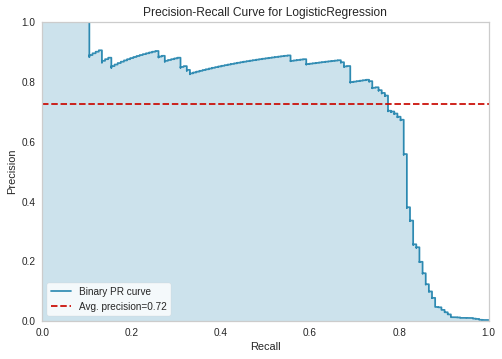

In [242]:
viz = PrecisionRecallCurve(pipe_log_model)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [243]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [244]:
over = SMOTE(sampling_strategy={1: 1500}, k_neighbors=3, random_state=101)
under = RandomUnderSampler(sampling_strategy={0: 4000}, random_state=101)

In [245]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [246]:
y_resampled.value_counts()

0    4000
1    1500
Name: Class, dtype: int64

***ii. Model Training***

In [247]:
operations = [('o', over), ('u', under), ("scaler", RobustScaler()), 
              ("log", LogisticRegression(random_state=101, C=0.0015, penalty= 'l2', solver='lbfgs'))]

smote_pipeline_log = imbpipeline(steps=operations)
smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=101,
                       sampling_strategy={1: 1500})),
                ('u',
                 RandomUnderSampler(random_state=101,
                                    sampling_strategy={0: 4000})),
                ('scaler', RobustScaler()),
                ('log', LogisticRegression(C=0.0015, random_state=101))])

In [248]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[84896    80]
 [   32   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.58      0.77      0.66       142

    accuracy                           1.00     85118
   macro avg       0.79      0.89      0.83     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198079    198]
 [    60    271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.58      0.82      0.68       331

    accuracy                           1.00    198608
   macro avg       0.79      0.91      0.84    198608
weighted avg       1.00      1.00      1.00    198608



***iii. Prediction and Model Evaluating***

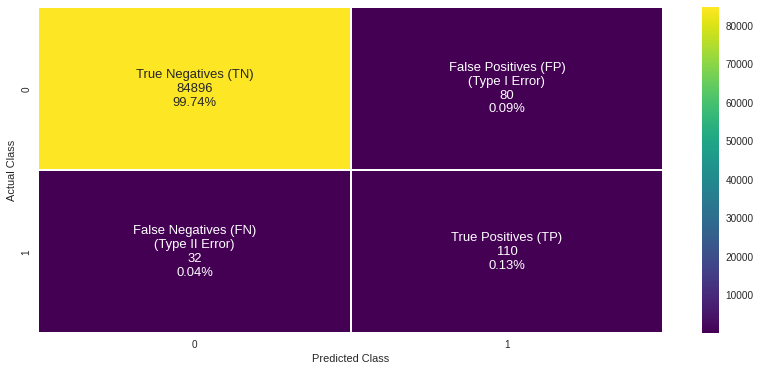

In [249]:
plt.figure(figsize=(14,6))

y_pred = smote_pipeline_log.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iv.  Plot Precision and Recall Curve***


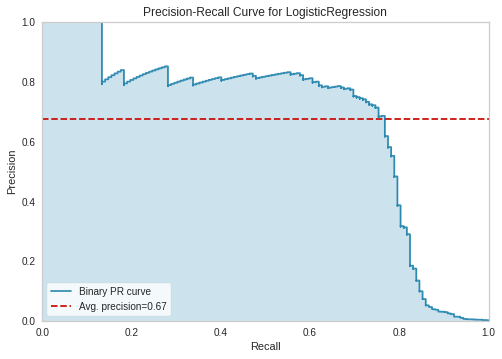

In [250]:
viz = PrecisionRecallCurve(smote_pipeline_log)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

***v. Apply StratifiedKFold***

In [251]:
# define evaluation procedure
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=101)
# evaluate model
scores = cross_validate(smote_pipeline_log, X, y, scoring=['precision','recall','f1'], cv=cv)
# summarize performance
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1
1,0.351773,0.051063,0.459770,0.851064,0.597015
2,0.388848,0.050281,0.493976,0.872340,0.630769
3,0.372156,0.050190,0.431818,0.808511,0.562963
4,0.371308,0.052927,0.515152,0.708333,0.596491
5,0.368494,0.049932,0.390000,0.812500,0.527027
6,0.364712,0.050509,0.500000,0.812500,0.619048
7,0.375914,0.050108,0.493506,0.808511,0.612903
8,0.367949,0.050277,0.520000,0.829787,0.639344
9,0.374201,0.049848,0.485714,0.723404,0.581197
10,0.362448,0.050689,0.512821,0.851064,0.640000


In [252]:
df_scores.mean()

fit_time          0.369780
score_time        0.050582
test_precision    0.480276
test_recall       0.807801
test_f1           0.600676
dtype: float64

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

## WO smote and with less feature

In [204]:
rf_model = RandomForestClassifier(class_weight={1:1, 0:0.04}, max_depth=5, random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.04, 1: 1}, max_depth=5,
                       random_state=101)

In [205]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)


Test_Set
[[84962    14]
 [   34   108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.89      0.76      0.82       142

    accuracy                           1.00     85118
   macro avg       0.94      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198238     39]
 [    49    282]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.88      0.85      0.87       331

    accuracy                           1.00    198608
   macro avg       0.94      0.93      0.93    198608
weighted avg       1.00      1.00      1.00    198608



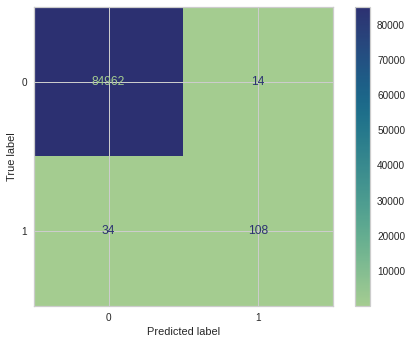

In [206]:
 plot_confusion_matrix(rf_model, X_test, y_test, cmap="crest")

In [207]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
V14,0.250787
V17,0.177535
V10,0.138082
V12,0.128302
V11,0.088268
V16,0.042029
V3,0.033927
V4,0.029299
V9,0.022934
V18,0.020889


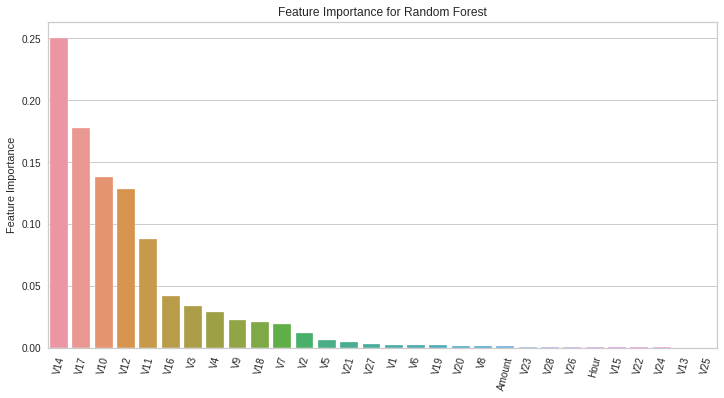

In [208]:
plt.figure(figsize = (12,6))
ax = sns.barplot(y=rf_feature_imp["Feature Importance"], x=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.xticks(rotation = 75);


In [167]:
Xrf = df[['V14','V10','V12','V17','V11','V16','V3','V4','V9','V18','V7']]
y = df['Class']

In [168]:
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, y, test_size=0.3, stratify=y, random_state=101)


In [169]:
rf_model = RandomForestClassifier(class_weight={1:1, 0:0.04}, max_depth=5, random_state=101)
rf_model.fit(Xrf_train, yrf_train)

RandomForestClassifier(class_weight={0: 0.04, 1: 1}, max_depth=5,
                       random_state=101)

In [170]:
eval_metric(rf_model, Xrf_train, yrf_train, Xrf_test, yrf_test)

Test_Set
[[84959    17]
 [   31   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.78      0.82       142

    accuracy                           1.00     85118
   macro avg       0.93      0.89      0.91     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198227     50]
 [    49    282]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.85      0.85      0.85       331

    accuracy                           1.00    198608
   macro avg       0.92      0.93      0.93    198608
weighted avg       1.00      1.00      1.00    198608



###With Smote

In [172]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [173]:
over = SMOTE(sampling_strategy={1: 1000}, k_neighbors=3, random_state=1)
under = RandomUnderSampler(sampling_strategy={0: 30000}, random_state=1)

In [174]:
steps = [('o', over), ('u', under)]
pipeline = imbpipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(Xrf_train, yrf_train)

In [175]:
y_resampled.value_counts()


0    30000
1     1000
Name: Class, dtype: int64

In [176]:
operations = [('o', over), ('u', under), ('clf', RandomForestClassifier(max_depth=5, random_state=101))]

smote_pipeline_rf = imbpipeline(steps=operations)
smote_pipeline_rf.fit(Xrf_train, yrf_train)

Pipeline(steps=[('o',
                 SMOTE(k_neighbors=3, random_state=1,
                       sampling_strategy={1: 1000})),
                ('u',
                 RandomUnderSampler(random_state=1,
                                    sampling_strategy={0: 30000})),
                ('clf', RandomForestClassifier(max_depth=5, random_state=101))])

In [177]:
eval_metric(smote_pipeline_rf, Xrf_train, yrf_train, Xrf_test, yrf_test)


Test_Set
[[84941    35]
 [   28   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.77      0.80      0.78       142

    accuracy                           1.00     85118
   macro avg       0.88      0.90      0.89     85118
weighted avg       1.00      1.00      1.00     85118


Train_Set
[[198193     84]
 [    49    282]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198277
           1       0.77      0.85      0.81       331

    accuracy                           1.00    198608
   macro avg       0.89      0.93      0.90    198608
weighted avg       1.00      1.00      1.00    198608



***ii. Prediction and Model Evaluating***

In [178]:
rf_model = RandomForestClassifier(class_weight={1:1, 0:0.04}, max_depth=5, random_state=101)
rf_model.fit(Xrf_train, yrf_train)

RandomForestClassifier(class_weight={0: 0.04, 1: 1}, max_depth=5,
                       random_state=101)

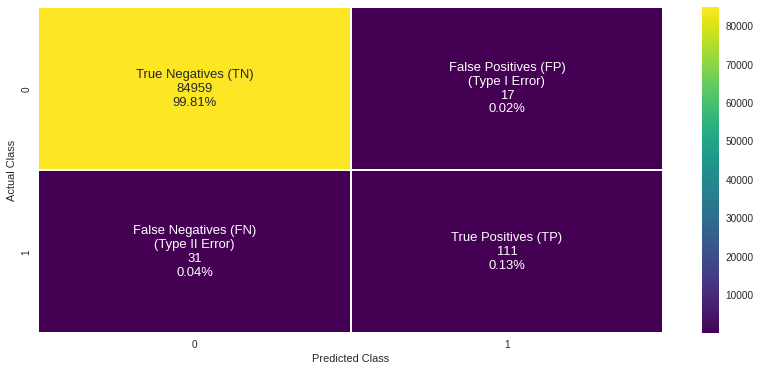

In [179]:
plt.figure(figsize=(14,6))

y_pred = rf_model.predict(Xrf_test)
cf_matrix = confusion_matrix(yrf_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis', linewidth=1)
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

***iii. Plot Precision and Recall Curve***


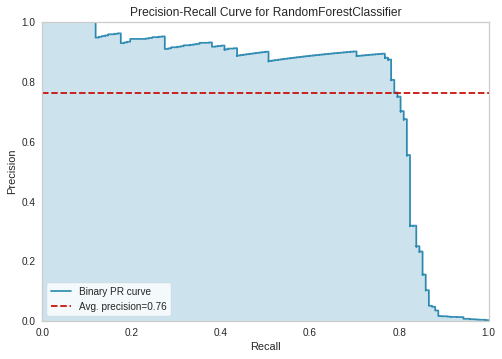

In [180]:
viz = PrecisionRecallCurve(rf_model)

viz.fit(Xrf_train, yrf_train)
viz.score(Xrf_test, yrf_test)
viz.show();

***iv. Apply StratifiedKFold***

In [253]:
# define evaluation procedure
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=101)
# evaluate model
scores = cross_validate(rf_model, Xrf, y, scoring=['precision','recall','f1'], cv=cv)
# summarize performance
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1
1,51.593838,0.185772,0.800000,0.851064,0.824742
2,50.001529,0.181541,0.823529,0.893617,0.857143
3,51.388820,0.186094,0.909091,0.851064,0.879121
4,50.110857,0.182273,0.804878,0.687500,0.741573
5,51.331026,0.181128,0.886364,0.812500,0.847826
6,52.627393,0.258842,0.888889,0.833333,0.860215
7,72.931933,0.276809,0.750000,0.765957,0.757895
8,57.424315,0.184993,0.812500,0.829787,0.821053
9,51.231536,0.183378,0.809524,0.723404,0.764045
10,50.079419,0.187653,0.840000,0.893617,0.865979


In [254]:
df_scores.mean()

fit_time          53.872067
score_time         0.200848
test_precision     0.832477
test_recall        0.814184
test_f1            0.821959
dtype: float64

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [255]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from sklearn.utils import class_weight

***ii. Define Model***

In [256]:
X = df[['V14','V10','V12','V17','V11','V16','V3','V4','V9','V18','V7']]
y = df['Class']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=101)

In [258]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (226980, 11)
Test features shape  :  (56746, 11)


In [259]:
scaler=RobustScaler()

In [260]:
X_train = scaler.fit_transform(X_train)


In [261]:
X_test  = scaler.transform(X_test)

In [263]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

***iii. Compile Model***

In [264]:
opt = Adam(lr = 0.002)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

***iv. Fit Model***

In [267]:
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [279]:
model.fit(X_train, y_train, validation_split=0.15, batch_size=128, epochs=100, verbose=1, callbacks=[early_stop])

Epoch 1/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0031 - recall: 0.7903 - val_loss: 0.0037 - val_recall: 0.7059
Epoch 2/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0030 - recall: 0.7933 - val_loss: 0.0033 - val_recall: 0.7353
Epoch 3/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0028 - recall: 0.7933 - val_loss: 0.0036 - val_recall: 0.7353
Epoch 4/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0028 - recall: 0.7994 - val_loss: 0.0036 - val_recall: 0.7059
Epoch 5/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0027 - recall: 0.7994 - val_loss: 0.0033 - val_recall: 0.6471
Epoch 6/100
1508/1508 [==============================] - 5s 3ms/step - loss: 0.0026 - recall: 0.7933 - val_loss: 0.0032 - val_recall: 0.6765
Epoch 7/100
1508/1508 [==============================] - 4s 3ms/step - loss: 0.0025 - recall: 0.8116 - val_loss: 0.0034 - val_recall: 0.6471
Epoch 8/100
1

***v. Prediction and Model Evaluating***

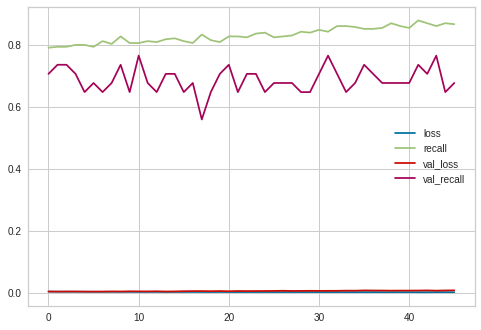

In [280]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [281]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.00589221203699708
recall :  0.7894737124443054


In [282]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56634    17]
 [   20    75]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.79      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [283]:
y_train_pred = model.predict(X_train) > 0.5

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[226558     44]
 [    56    322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226602
           1       0.88      0.85      0.87       378

    accuracy                           1.00    226980
   macro avg       0.94      0.93      0.93    226980
weighted avg       1.00      1.00      1.00    226980



***vi. Plot Precision and Recall Curve***

In [284]:
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve


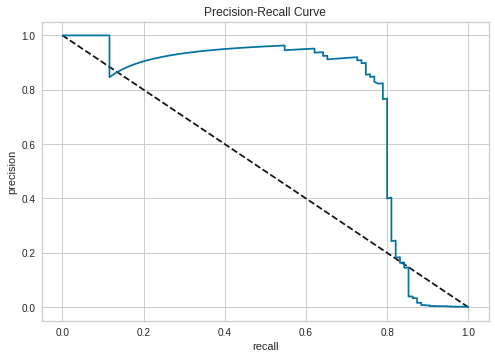

In [285]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.show() 

In [286]:
average_precision_score(y_test, y_pred_proba)

0.7607594108726454

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [275]:
final_scaler = RobustScaler()
final_scaler.fit(X)

RobustScaler()

In [276]:
rf_model.fit(X,y)


RandomForestClassifier(class_weight={0: 0.04, 1: 1}, max_depth=5,
                       random_state=101)

In [277]:
import pickle
pickle.dump(smote_pipeline_rf, open("fraud_detection_rf.pkl", "wb"))


### Save and Export Variables as .pkl

In [278]:
pickle.dump(final_scaler, open('fraud_detection_scaler.pkl', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___